In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import cv2 as cv
%matplotlib ipympl

In [2]:
ROOT='./PetImages/'
CATEGORIES=['Cat','Dog']
IW=100
IH=100
X=[None]*(len(os.listdir(ROOT+CATEGORIES[0]))+len(os.listdir(ROOT+CATEGORIES[1]))) #max size of list assuming not error in loading images
#should change above to preallocated np array of size needed. Aobve is fine for small data samples but inefficient for larger data sets

i=0
for category in CATEGORIES:
    label=CATEGORIES.index(category)
    
    for pic in os.listdir(ROOT+category):
        try:
            img=cv.imread(ROOT+category+'/'+pic, cv.IMREAD_GRAYSCALE) #this generates currupt jpeg errors, however opencv does not catch
        except Exception as e:
            continue
        try:
            img_rez=cv.resize(img, (IH,IW))
           
        except Exception as e:
            #print(f'{category} index {i} failed to resize')
            continue
        X[i]=(img_rez,label)
        i+=1
        


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


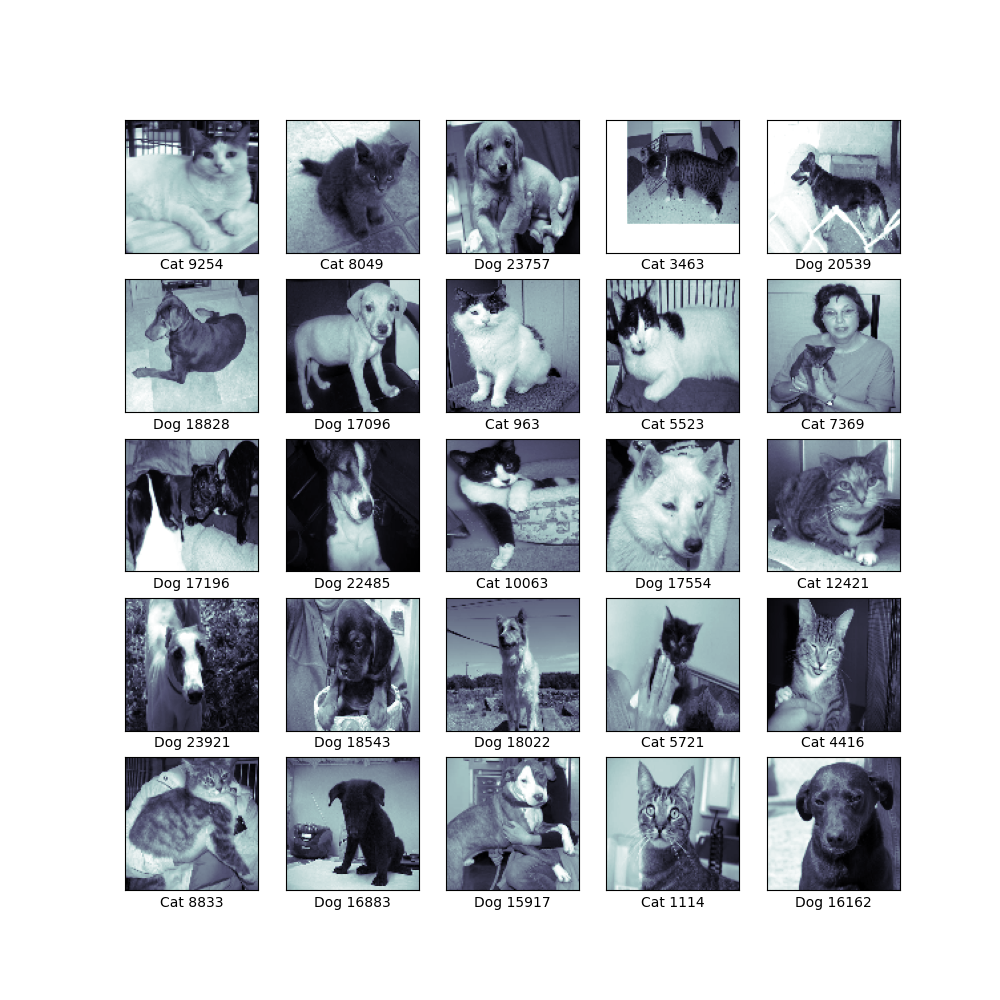

In [3]:
#fig1=plt.figure(figsize=(10,10))
#ax1=fig1.subplots(5,5)
#ax1.imshow(X[5][0], cmap='bone')

pet_class={0:'Cat', 1:'Dog'}
fig1, ax=plt.subplots(5,5, figsize=(10,10),sharey=True,sharex=True)
plt.xticks([])   
plt.yticks([])

np.random.seed(42)
rand_pic=np.random.permutation(len(X))

for i in range(25):
    ax[int(i/5),i%5].imshow(X[rand_pic[i]][0],cmap='bone')
    ax[int(i/5),i%5].set_xlabel(pet_class.get(X[rand_pic[i]][1])+f' {rand_pic[i]}')

In [ ]:
plt.close()

In [ ]:
#Get rid of None images and shuffle

X_cleaned=X[:X.index(None)]
np.random.shuffle(X_cleaned)

X_data=np.empty((len(X_cleaned), IH, IW,1), dtype='f' )
L_data=np.empty(len(X_cleaned), dtype='int8')

i=0
for image, label in X_cleaned:
    X_data[i]=np.array(image).reshape(IH,IW,1)
    L_data[i]=label
    i+=1


In [ ]:
pickle_out=open('data.pickle', 'wb')
pickle.dump(X_cleaned, pickle_out)


In [ ]:
pickle_out2=open('label.pickle', 'wb')
pickle.dump(L_data, pickle_out2)

In [ ]:
fig2=plt.figure()
ax2=fig2.add_subplot()
immg=cv.imread(ROOT+CATEGORIES[0]+'/9733.jpg',cv.IMREAD_GRAYSCALE)
#ax2.imshow(immg, cmap='bone')
ax2.imshow(immg, cmap='Reds')


In [ ]:
fig2=plt.figure()
ax2=fig2.add_subplot()
ax2.imshow(X_data[0])

pickle_in=open('data.pickle', 'rb')
data=pickle.load('pickle_in')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [ ]:

conv_features=48
k_size=(3,3)

model=Sequential([
    Input(X_data.shape[1:]),
    Rescaling(1./255),
    Conv2D(conv_features,k_size, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),  
    
    Conv2D(conv_features,k_size, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(50),
    Dense(1, activation='sigmoid')
])
   
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    

In [ ]:
model.summary()

In [ ]:
epochs=10
history=model.fit(X_data, 
                  L_data, 
                  batch_size=30, 
                  validation_split=0.1,
                  epochs=epochs
                 )
    

In [ ]:
#from chat gpt for explaining outputo of a conv layer



import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Example grayscale image (100x100 pixels)
image = X_data[0].reshape((1, 100, 100, 1))

# Define an input layer
input_layer = Input(shape=(100, 100, 1))

# Add a Conv2D layer
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), activation='relu')(input_layer)

# Define the model
conv_model = Model(inputs=input_layer, outputs=conv_layer)

# Get the output of the convolution
conv_output = conv_model.predict(image)

print("Shape of output after Conv2D: ", conv_output.shape)

In [ ]:
fig5=plt.figure()
ax6=fig5.add_subplot(1,2,1)
ax7=fig5.add_subplot(1,2,2)

ax6.imshow(image[0])
ax7.imshow(conv_output[0])


In [ ]:
pet_class.get(0)

In [ ]:
import sklearn